In [27]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
path = "dataset\Customer Churn.csv"
df = pd.read_csv(path)
df.info()
print(f"Shape: {df.shape}")
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [29]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Call Failure,3150.0,7.627937,7.263886,0.0,1.00000,6.00,12.00000,36.00
Complains,3150.0,0.076508,0.265851,0.0,0.00000,0.00,0.00000,1.00
Subscription Length,3150.0,32.541905,8.573482,3.0,30.00000,35.00,38.00000,47.00
Charge Amount,3150.0,0.942857,1.521072,0.0,0.00000,0.00,1.00000,10.00
Seconds of Use,3150.0,4472.459683,4197.908687,0.0,1391.25000,2990.00,6478.25000,17090.00
Frequency of use,3150.0,69.460635,57.413308,0.0,27.00000,54.00,95.00000,255.00
Frequency of SMS,3150.0,73.174921,112.237560,0.0,6.00000,21.00,87.00000,522.00
Distinct Called Numbers,3150.0,23.509841,17.217337,0.0,10.00000,21.00,34.00000,97.00
Age Group,3150.0,2.826032,0.892555,1.0,2.00000,3.00,3.00000,5.00
Tariff Plan,3150.0,1.077778,0.267864,1.0,1.00000,1.00,1.00000,2.00


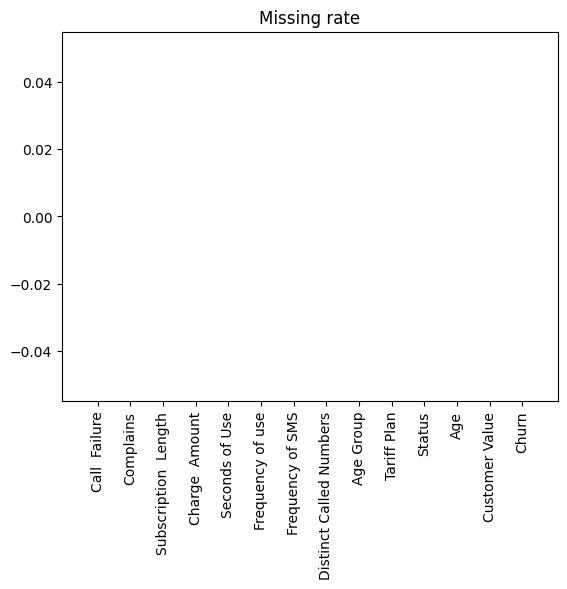

In [30]:
missing_rate = df.isna().mean()
missing_rate = missing_rate.sort_values(ascending = False)
plt.figure()
plt.bar(missing_rate.index, missing_rate.values)
plt.title("Missing rate")
plt.xticks(rotation = 90)
plt.show()

In [31]:
dupe_rate = df.duplicated().mean()
print(f"Duplication Rate: {dupe_rate}")

df = df.drop_duplicates().reset_index(drop=True)
print(f"Dataset shape after dropping duplicate: {df.shape}")

Duplication Rate: 0.09523809523809523
Dataset shape after dropping duplicate: (2850, 14)


In [32]:
df_clean = df.copy()
churn_dist = df_clean["Churn"].value_counts(normalize=True)
print("Churn Distribution: ", churn_dist)

Churn Distribution:  Churn
0    0.843509
1    0.156491
Name: proportion, dtype: float64


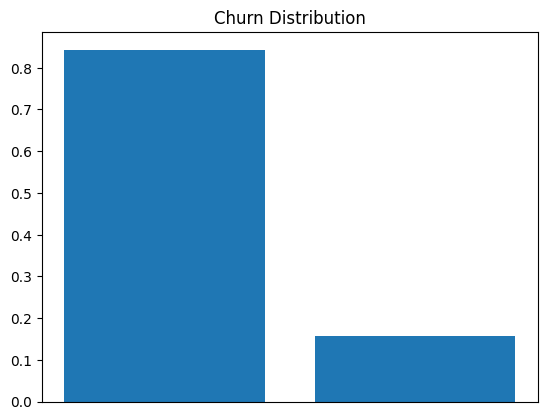

In [33]:
plt.bar(churn_dist.index, churn_dist.values)
plt.xticks([])
plt.title("Churn Distribution")
plt.show()

Karena distribusi tidak imbang, akan ada potensi bias pada model (condong untuk tidak churn)

Pada model, maka harus menerapkan balancing (under/oversampling)

In [34]:
subs_len = df_clean["Subscription  Length"].value_counts(normalize=True).sort_index(ascending=False)
print(f"{subs_len}")

Subscription  Length
47    0.000351
46    0.004561
45    0.008070
44    0.015439
43    0.019649
42    0.028070
41    0.037895
40    0.057544
39    0.063158
38    0.076842
37    0.070526
36    0.081053
35    0.069474
34    0.061404
33    0.048070
32    0.040351
31    0.035088
30    0.027368
29    0.023158
28    0.019298
27    0.017544
26    0.014737
25    0.015789
24    0.012982
23    0.011930
22    0.009123
21    0.008772
20    0.009123
19    0.009825
18    0.009825
17    0.010526
16    0.009474
15    0.010175
14    0.008421
13    0.008070
12    0.006667
11    0.008070
10    0.005614
9     0.007018
8     0.004211
7     0.005614
6     0.002807
5     0.002105
4     0.001404
3     0.002807
Name: proportion, dtype: float64


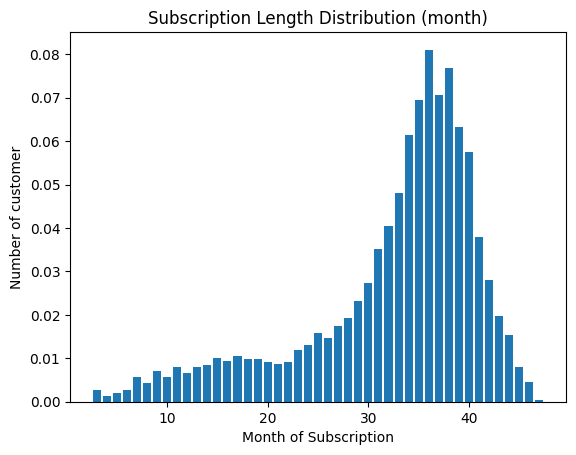

In [35]:
plt.figure()
plt.bar(subs_len.index, subs_len.values)
plt.xlabel("Month of Subscription")
plt.ylabel("Number of customer")
plt.title("Subscription Length Distribution (month)")
plt.show()

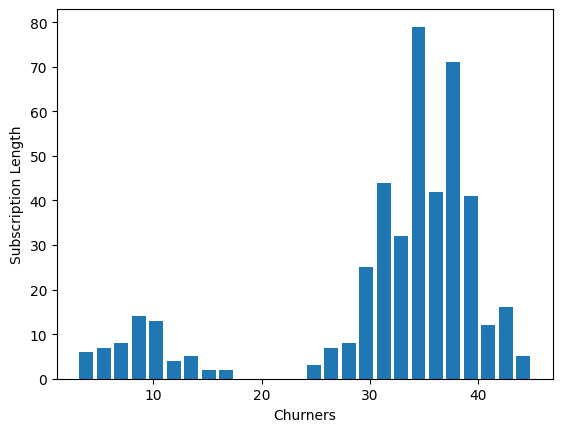

In [36]:
churn_sub = df_clean[df_clean["Churn"] == 1]["Subscription  Length"]
unchurn_sub = df_clean[df_clean["Churn"] == 0]["Subscription  Length"]

#Freedman Diaconis Rule to determine bins size
q75, q25 = np.percentile(churn_sub, [75, 25])
iqr = q75 - q25
bin_width = 2 * iqr / (churn_sub.shape[0] ** (1/3))
num_bins = int((max(churn_sub) - min(churn_sub)) / bin_width)

plt.figure()
plt.hist(
    churn_sub, 
    bins=num_bins, 
    rwidth=0.8
)
plt.xlabel("Churners")
plt.ylabel("Subscription Length")

plt.show()

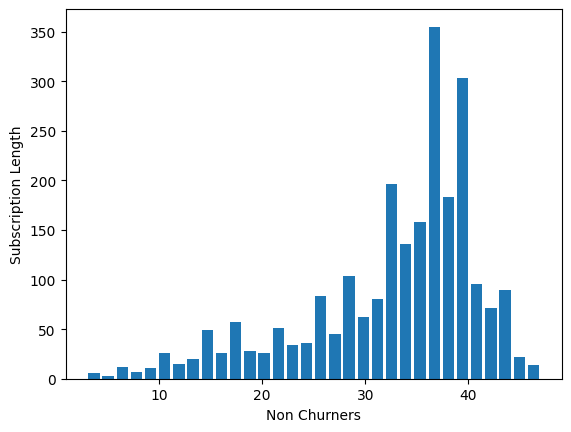

In [37]:

#Freedman Diaconis Rule
q75, q25 = np.percentile(unchurn_sub, [75, 25])
iqr = q75 - q25
bin_width = 2 * iqr / (unchurn_sub.shape[0] ** (1/3))
num_bins = int((max(unchurn_sub) - min(unchurn_sub)) / bin_width)

plt.figure()
plt.hist(
    unchurn_sub, 
    bins=num_bins, 
    rwidth=0.8
)
plt.xlabel("Non Churners")
plt.ylabel("Subscription Length")

plt.show()

We use freedman diaconis rules to determine bins because its better for skewed distribution. References: https://medium.com/@eddie.sotocastillo/the-art-of-histograms-finding-the-perfect-bin-size-for-data-visualization-b2264aa3f103

The graphs above shows that both have similar distribution, with both clusteers around 30 - 40. This shows that tenure/subs len is not enough for predicting churn 


                         Call  Failure  Complains  Subscription  Length  \
Call  Failure                 1.000000   0.149564              0.177206   
Complains                     0.149564   1.000000             -0.019229   
Subscription  Length          0.177206  -0.019229              1.000000   
Charge  Amount                0.585442  -0.035887              0.084275   
Seconds of Use                0.495463  -0.108934              0.127184   
Frequency of use              0.567096  -0.095519              0.109148   
Frequency of SMS             -0.031926  -0.114729              0.080530   
Distinct Called Numbers       0.498604  -0.061314              0.099215   
Age Group                     0.049340   0.015761              0.030078   
Tariff Plan                   0.187537   0.002461             -0.160538   
Status                       -0.094090   0.282928              0.144235   
Age                           0.043799  -0.000400              0.005900   
Customer Value           

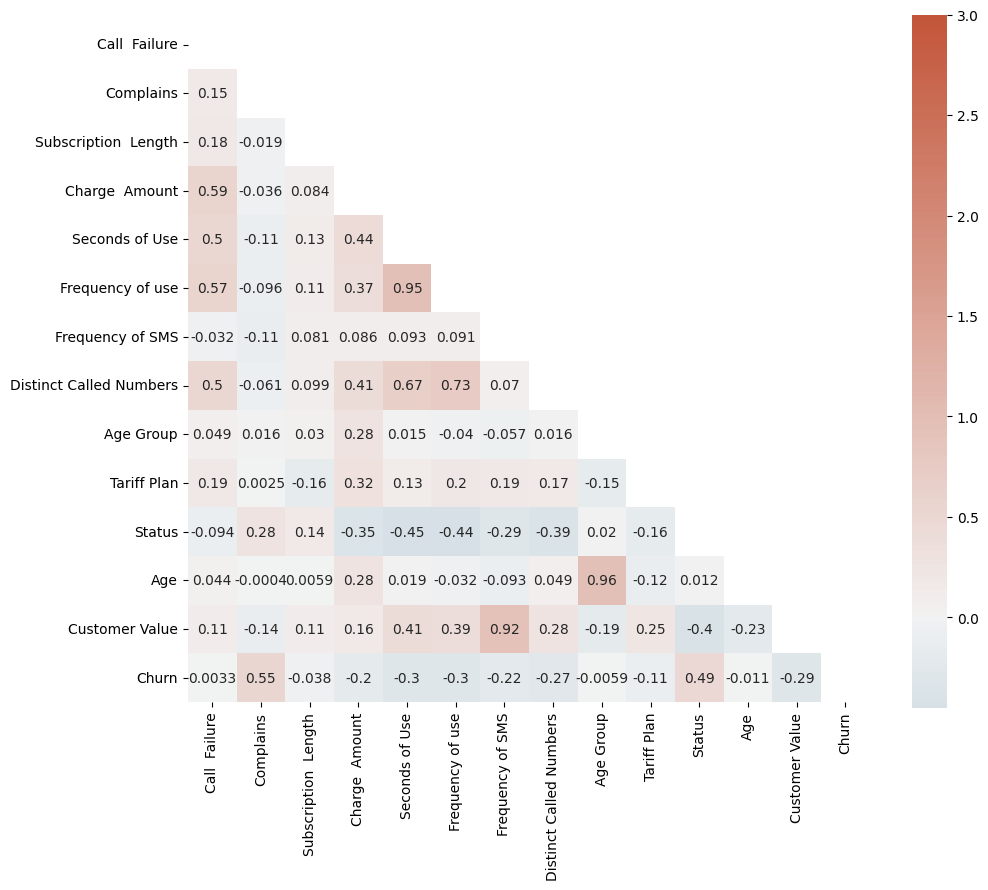

In [38]:
corr = df_clean.corr()
print(corr)

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 
                             20, 
                             as_cmap=True)
sns.heatmap(corr,  
            mask=mask, 
            cmap=cmap, 
            vmax=3, 
            center=0, 
            square=True, 
            annot=True
            )

plt.show()


In [39]:
df_clean.to_csv("df_clean.csv", index=False)